# **ALPS WATER- LINEAR**

Regressão Linear com Método dos Mínimos Quadrados Básico (linear)
Y= boiling , X= Pressure -> Y= Beta0 +Beta1*X

Passo a passo:

* **1° passo:** X without Bias (Beta0): transformar X em matriz com a primeira coluna em 1;
* **2° passo:** Transpor a matriz X -> XT
* **3° passo:** XT.X
* **4° passo:** XT.Y
* **5°** passo: Beta= ((XT.X)^-1)*XT.Y



In [33]:
#definição das funções
#calculo da matriz transposta
def transposta(X):
    return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]


#Multiplicação escalar de duas matrizes:
def multiplicacao_matrizes(matriz1,matriz2):
    x = []
    for i in range(0,len(matriz1)):
        y=[]
        for j in range(0,len(matriz2[0])):
            total = 0
            for k in range(0,len(matriz1[0])):
                total = total + matriz1[i][k]*matriz2[k][j]
            y.append(total)
        x.append(y)
    return x

#Multiplicação escalar da matriz transposta por um vetor:
def multiplicacao_matriz_vetor(matriz1,vetor2):
    x=[]
    total = 0
    for i in range(len(matriz1)):
        total=0
        for j in range(len(vetor2)):
            total = total + matriz1[i][j] * vetor2[j]
        x.append(total)
    return x

# Cálculo do determinante da matriz
def Determinante(matriz):
    #Determinante da matriz 2x2
    if len(matriz) == 2:
        return (matriz[0][0]*matriz[1][1])-(matriz[0][1]*matriz[1][0])

    determinant = 0
    for c in range(len(matriz)):
        determinant = determinant + ((-1)**c)*matriz[0][c]*Determinante([row[:c] + row[c+1:] for 
                                                                         row in (matriz[:0]+matriz[0+1:])])
    return determinant

#Calculo da matriz Inversa usando cofatores
def matriz_inversa(m):
    determinant = Determinante(m)
    
    #Matriz 2x2:
    if len(m) == 2:
        a = m[0][0]
        b = m[0][1]
        c = m[1][0]
        d = m[1][1]

        inverse= [d, -b, -c, a]
        calc_inverse=[]
        for i in inverse:
            x = (1/(a*d-b*c)) * i
            calc_inverse.append(x)
        col = 2 
        inverse_matrix = [calc_inverse[i:i+col] for i in range(0, len(calc_inverse), col)]
        return inverse_matrix
    
    else:
    #Matriz de cofatores:
        cofactors = []
        for r in range(len(m)):
            cofactorRow = []
            for c in range(len(m)):
                minor = [row[:c] + row[c+1:] for row in (m[:r]+m[r+1:])]
                cofactorRow.append(((-1)**(r+c)) * Determinante(minor))
            cofactors.append(cofactorRow)
        cofactors = transposta(cofactors)
        for r in range(len(cofactors)):
            for c in range(len(cofactors)):
                cofactors[r][c] = cofactors[r][c]/determinant
        return cofactors


In [34]:
#Importando o dataset Alps Water
import pandas as pd
alps_water= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/alpswater.txt',sep='\t',header=None)
alps_water.columns= ['Row','Pressure','Boiling']
alps_water.drop(columns='Row', inplace=True)
alps_water.head()

,Pressure,Boiling
0,20.79,194.5
1,20.79,194.3
2,22.40,197.9
3,22.67,198.4
4,23.15,199.4


In [49]:
# Entrada
x_input = [i for i in alps_water['Pressure']]
X_alps = [[1,i] for i in x_input]

#Saída
Y_alps = alps_water['Boiling']
y_input=[i for i in alps_water['Boiling']]

#Matriz transposta
Xt_alps = transposta(X_alps)
X=Xt_alps [1]

#Transposta de X escalar X
m_alps = multiplicacao_matrizes(Xt_alps,X_alps)

#matriz inversa
inv_alps = matriz_inversa(m_alps)

#Multiplicação da matriz X transposta pelo vetor y
XtY_alps= multiplicacao_matriz_vetor(Xt_alps,Y_alps)

In [50]:
#Resultado final
print('Método Linear - Dataset Alps Water:')
beta_alps = multiplicacao_matriz_vetor(inv_alps,XtY_alps)
print('Coeficiente beta0 =', beta_alps[0])
print('Coeficiente beta1 =', beta_alps[1])
print(beta_alps)
Y= multiplicacao_matriz_vetor(X_alps,beta_alps)
print('Y=',Y)

Método Linear - Dataset Alps Water:
Coeficiente beta0 = 155.29648345697024
Coeficiente beta1 = 1.9017835240176737
[155.29648345697024, 1.9017835240176737]
Y= [194.83456292129767, 194.83456292129767, 197.89643439496612, 198.4099159464509, 199.32277203797938, 199.70312874278292, 200.73009184575247, 200.92027019815424, 200.97732370387476, 200.95830586863457, 203.10732125077456, 205.82687169011984, 209.47829605623377, 208.08999408370084, 210.52427699444348, 212.12177515461832, 212.4640961889415]


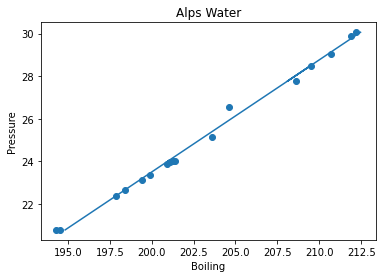

In [47]:
#Gráfico
import matplotlib.pyplot as plt
plt.scatter(y_input,X)
plt.plot(Y,X)
plt.xlabel('Boiling')
plt.ylabel('Pressure')
plt.title('Alps Water')
plt.show()

In [48]:
#Qual o valor de pressão para a temperatura de 200 F?
P= (200-beta_alps[0])/beta_alps[1] 
print("A pressão será de:",P)

A pressão será de: 23.50610149812946


## **Quadrático - US Census Dataset**
Regressão Linear com Método dos Mínimos Quadrados
(Quadrático)
Y= Population , X= Year -> Y= Beta0 +Beta1*X +Beta2 *X^2





In [39]:
us_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/US-Census.txt', sep='\t', header=None)
us_census.columns = ['x','y'] #atribuição de nomes às colunas
us_census

,x,y
0,1900,75.995
1,1910,91.972
2,1920,105.711
3,1930,123.203
4,1940,131.669
5,1950,150.697
6,1960,179.323
7,1970,203.212
8,1980,226.505
9,1990,249.633


In [51]:
#Definição da matriz de entrada (X) -> considerando incluindo x^2
x_input = [i for i in us_census['x']]
X_us = [[1,i,i**2] for i in x_input]

#Definição do saída
Y_us = [i for i in us_census['y']]

#Cálculo da transposta de X
Xt_us = transposta(X_us)

#Transposta de X escalar X
m_us= multiplicacao_matrizes(Xt_us,X_us)

#Cálculo da inversa da matrix 2x2 (Inversa da Multiplicação de X transposta por X)
inv_us = matriz_inversa(m_us)

#Multiplicação da matriz X transposta pelo vetor y
XtY_us = multiplicacao_matriz_vetor(Xt_us,Y_us)

#Resultado final
beta_us = multiplicacao_matriz_vetor(inv_us,XtY_us)
print('Método Quadrático - Dataset US-Census:')
print('Coeficiente b0 =', beta_us[0])
print('Coeficiente b1 =', beta_us[1])
print('Coeficiente b2 =', beta_us[2])

Método Quadrático - Dataset US-Census:
Coeficiente b0 = 32294.01736307144
Coeficiente b1 = -34.98747000005096
Coeficiente b2 = 0.009490454545471039


# **Books x Grades - Bisquare**

Dataset contains 3 variables, books, attend and grade and has 40 
cases.
• Books represents the number of books read by students on a 
statistics course,
• Attend represents the number of lectures they attended and 
• Grade represents their final grade on the course.
Regressão Linear com Método dos Mínimos Quadrados (Bisquare) 
Y= Grade, X1= Books, X2=Attend -> 
Y= Beta0 +Beta1*X1 + Beta2 *X2


In [41]:
import pandas as pd
books_attend_grade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Books_attend_grade.txt',sep='\t',header=None)
books_attend_grade.columns=['Books', 'Attend', 'Grade']
books_attend_grade.head()

,Books,Attend,Grade
0,0,9,45
1,1,15,57
2,0,10,45
3,2,16,51
4,4,10,65


In [53]:
#Cálculo da matriz X
x_input = [i for i in books_attend_grade['Books']]
X_books=[[1,i,j] for i, j in zip(x_input, books_attend_grade['Attend'])]

#Cálculo da matriz Y
Y_books = [i for i in books_attend_grade['Grade']]

#Cálculo da matrix X transposta
Xt_books = transposta(X_books)

#Multiplicação de X transposta pela entrada X
m_books = multiplicacao_matrizes(Xt_books,X_books)

#Cálculo da inversa da matrix 3x3 (Inversa da Multiplicação de X transposta por X)
inv1_books = matriz_inversa(m_books)

#Multiplicação da matriz X transposta por y
XtY1_books = multiplicacao_matriz_vetor(Xt_books,Y_books)

beta_books = multiplicacao_matriz_vetor(inv1_books,XtY1_books)

In [43]:
#Cálculo da matriz W
W_books=[]
for i in range(len(Y_books)):
    w=1/(Y_books[i]-(beta_books[0]*X_books[i][0]+beta_books[1]*X_books[i][1]+beta_books[2]*X_books[i][2]))
    if w<0:
        w=-w
    W_books.append(w)

In [54]:
#Produto vetorial entre X transposta x W
Z=[]
for i,j in zip(Xt_books[0],W_books):
    Z.append(i*j)

for i,j in zip(Xt_books[1],W_books):
    Z.append(i*j)

for i,j in zip(Xt_books[2],W_books):
    Z.append(i*j)

n = 3 #separando a lista em 03 partes para representar a matriz
XtW_books = [Z[i::n] for i in range(n)]

#Multiplicação da transposta de X pelo produto vetorial
mr_books  = multiplicacao_matrizes(XtW_books,X_books)

#Inversa do elemento 01 do produto escalar
inv2_books = matriz_inversa(mr_books)

#Cálculo do elemento 02 do produto escalar 
XtY2_books = multiply_matrix_vector(XtW_books,Y_books)

#Cálculo do coeficiente bettha
beta_books = multiplicacao_matriz_vetor(inv2_books,XtY2_books)

#Resposta - coeficientes método robusto dataset Books, attend and grade
print('Método Robusto - DatasetBooks, attend and grade:')
print('Coeficiente b0 =', beta_books[0])
print('Coeficiente b1 =', beta_books[1])
print('Coeficiente b2 =', beta_books[2])

Método Robusto - DatasetBooks, attend and grade:
Coeficiente b0 = -818.8498826007017
Coeficiente b1 = 85.33311830852267
Coeficiente b2 = 46.5306542633009
